# Cells 1: Load required packages. 

In [24]:
import sys

sys.path.append('/home/aklantbhowmick/anaconda3/lib/python3.7/site-packages')
sys.path.append('/home/aklantbhowmick/anaconda3/lib/python3.7/site-packages/scalpy/')
sys.path.append('/home/aklantbhowmick/anaconda3/envs/nbodykit-env/lib/python3.6/site-packages/')


import arepo_package
import scipy.interpolate

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/apps/jupyterhub/1.0.0/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f', 'WRAP']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Cells 2 and 3 Generating dark matter correlation functions and plotting them

In [12]:
NBINS = 20
RMIN = 10**(-3)
RMAX = 10**1
WRAP = True

subsample_factor=500
basePath='/ufrc/lblecha/aklantbhowmick/arepo_runs_aklant/L25_n128/output/'

for z in [0,1,2,3]:
    r,DD,RR,xi,output_redshift=arepo_package.get_dark_matter_correlation_function(basePath,z,NBINS, RMIN, RMAX, WRAP,subsample_factor)
    dxi=numpy.sqrt(DD)/RR
    numpy.save('./arepo_dark_matter_correlation/z%.2f.npy'%z,[r,xi,dxi,output_redshift])
    

#basePath='/ufrc/lblecha/lblecha/arepo_runs/L25n128_ngenic_bhs_gfm_mod2_ompi_new/output/'
#r_laura,DD_laura,RR_laura,xi_laura,output_redshift=arepo_package.get_dark_matter_correlation_function(basePath,z,NBINS, RMIN, RMAX, WRAP,subsample_factor)





Desired redshift:  0
Output redshift:  2.220446049250313e-16
Output snapshot:  19
Below are the list of properties for ptype  1
dict_keys(['count', 'Coordinates', 'ParticleIDs', 'Potential', 'SubfindDMDensity', 'SubfindDensity', 'SubfindHsml', 'SubfindVelDisp', 'Velocities'])
Desired redshift:  1
Output redshift:  0.9972942257819404
Output snapshot:  12
Below are the list of properties for ptype  1
dict_keys(['count', 'Coordinates', 'ParticleIDs', 'Potential', 'SubfindDMDensity', 'SubfindDensity', 'SubfindHsml', 'SubfindVelDisp', 'Velocities'])
Desired redshift:  2
Output redshift:  1.9878372438720144
Output snapshot:  10
Below are the list of properties for ptype  1
dict_keys(['count', 'Coordinates', 'ParticleIDs', 'Potential', 'SubfindDMDensity', 'SubfindDensity', 'SubfindHsml', 'SubfindVelDisp', 'Velocities'])
Desired redshift:  3
Output redshift:  2.9891842243418814
Output snapshot:  9
Below are the list of properties for ptype  1
dict_keys(['count', 'Coordinates', 'ParticleIDs', '

Text(0, 0.5, '$\\xi(r)$')

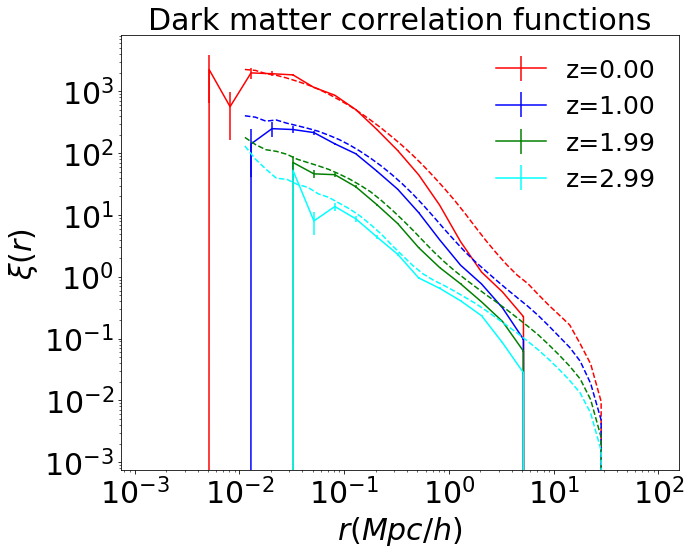

In [13]:
f,ax=plt.subplots(figsize=(10,8))

ax.set_title('Dark matter correlation functions',fontsize=30)
for z,col in zip([0,1,2,3],['red','blue','green','cyan']):
    r,xi,dxi,output_redshift=numpy.load('./arepo_dark_matter_correlation/z%.2f.npy'%z)
    ax.errorbar(r,xi,dxi,color=col,label='z=%.2f'%output_redshift)
    if (z==0):
        z=0.06
    
    r_space=numpy.load('/home/aklantbhowmick/dm_correlation_functions_mb2/z%.2f_rspace_p_mb2.npy'%z)
    xi_space=numpy.load('/home/aklantbhowmick/dm_correlation_functions_mb2/z%.2f_xi_space_mb2.npy'%z)
    
    #r_space=numpy.load('/home/aklantbhowmick/linear_matter_correlation/'%z)
    #xi_space=numpy.load('/home/aklantbhowmick/linear_matter_correlation/z%.2f_xi_space.npy'%z)
    
    
    ax.errorbar(r_space,xi_space,linestyle='dashed',color=col)    

ax.legend(loc='upper right',fontsize=25,frameon=False)    
ax.tick_params(labelsize=30)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('$r(Mpc/h)$',fontsize=30)
ax.set_ylabel(r'$\xi(r)$',fontsize=30)

# Cell 4: Generating halo mass funtion

Desired redshift:  0.0
Output redshift:  2.220446049250313e-16
Output snapshot:  19
[0.00000000e+00 0.00000000e+00 0.00000000e+00 1.37729941e-13
 1.30449799e-13 9.60227253e-14 2.32217592e-14 6.00830146e-15
 1.40180052e-15 3.28298290e-16 8.15841762e-17 2.15040126e-17
 6.20902921e-18 1.33626209e-18]
Desired redshift:  0.0
Output redshift:  2.220446049250313e-16
Output snapshot:  19


/apps/jupyterhub/1.0.0/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


Desired redshift:  3.0
Output redshift:  2.9891842243418814
Output snapshot:  9
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.77065664e-13 9.68887126e-14 2.36219996e-14 5.16445444e-15
 1.02541274e-15 1.83116037e-16 3.15974156e-17 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
Desired redshift:  3.0
Output redshift:  2.9891842243418814
Output snapshot:  9
Desired redshift:  5.0
Output redshift:  4.995933468164624
Output snapshot:  7
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.22780191e-13 6.92800797e-14 1.34292678e-14 2.61208055e-15
 3.93871944e-16 4.89398195e-17 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
Desired redshift:  5.0
Output redshift:  4.995933468164624
Output snapshot:  7


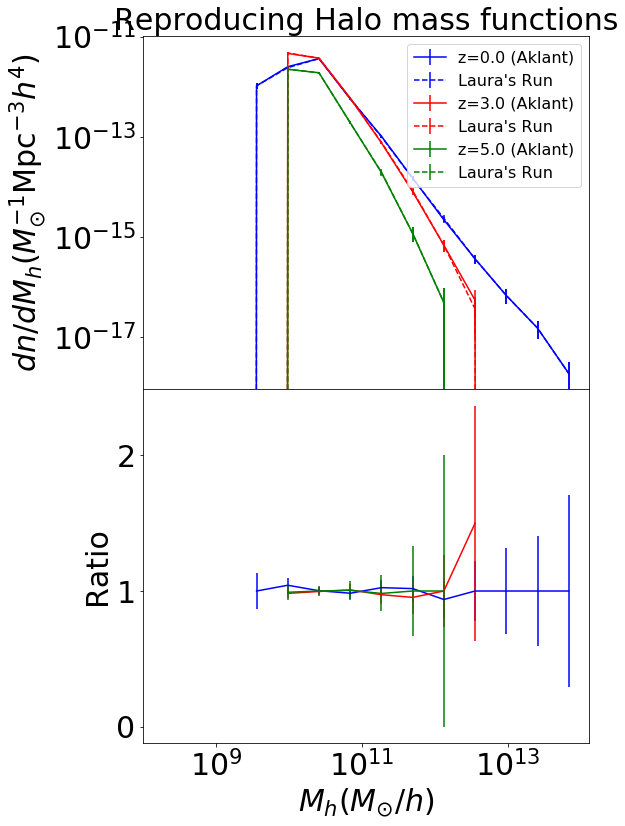

In [27]:
f,ax=plt.subplots(2,1,figsize=(8,13),sharex=True)
Nbins=15
log_mass_min=8
log_mass_max=14
ax[0].set_title('Reproducing Halo mass functions',fontsize=30)
for desired_redshift,col in zip([0.,3., 5.],['blue','red','green']):
    object_type='group'
    basePath = '/ufrc/lblecha/aklantbhowmick/arepo_runs_aklant/L25_n128/output/'
    category='total'
    centers,HMF,dHMF,output_redshift=arepo_package.get_mass_function(category,object_type,desired_redshift,basePath,Nbins,log_mass_min,log_mass_max,list_all=False)
    print(dHMF)
    ax[0].errorbar(centers,HMF,dHMF,color=col,label='z=%.1f (Aklant)'%output_redshift)

    
    object_type='group'
    basePath='/ufrc/lblecha/lblecha/arepo_runs/L25n128_ngenic_bhs_gfm_mod2_ompi_new_ddfrac0.05/output/'
    centers_laura,HMF_laura,dHMF_laura,output_redshift=arepo_package.get_mass_function(category,object_type,desired_redshift,basePath,Nbins,log_mass_min,log_mass_max,list_all=False)
    ax[0].errorbar(centers_laura,HMF_laura,dHMF_laura,color=col,linestyle='dashed',label="Laura's Run")
    
    ax[1].errorbar(centers,HMF/HMF_laura,dHMF/HMF_laura,color=col)
    
#    object_type='subhalo'
#    centers,HMF,dHMF=arepo_package.get_mass_function(category,object_type,desired_redshift,basePath,Nbins,log_mass_min,log_mass_max)
#    ax.errorbar(centers,HMF,dHMF)
#    print("-----------")
    
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].tick_params(labelsize=30)
ax[1].tick_params(labelsize=30)

ax[1].set_xlabel('$M_{h}(M_{\odot}/h)$',fontsize=30)

ax[0].set_ylabel('$dn/dM_{h}(M_{\odot}^{-1} \mathrm{Mpc}^{-3}h^4)$',fontsize=30)

ax[0].legend(loc='upper right',fontsize=16)



ax[1].set_ylabel('Ratio',fontsize=30)

plt.subplots_adjust(hspace=0)





In [18]:
HM_sp

array([3.27096344e-04, 6.57212769e-04, 1.32049359e-03, 2.65317929e-03,
       5.33085539e-03, 1.07109306e-02, 2.15207552e-02, 4.32402117e-02,
       8.68796603e-02, 1.74561481e-01, 3.50734688e-01, 7.04707710e-01,
       1.41592199e+00, 2.84491719e+00, 5.71610151e+00, 1.14849798e+01,
       2.30760004e+01, 4.63650616e+01, 9.31582120e+01, 1.87176554e+02,
       3.76081310e+02, 7.55634979e+02, 1.51824674e+03, 3.05051145e+03,
       6.12918828e+03, 1.23149674e+04, 2.47436389e+04, 4.97157358e+04,
       9.98904972e+04, 2.00703284e+05, 4.03259661e+05, 8.10242620e+05,
       1.62796621e+06, 3.27096344e+06, 6.57212769e+06, 1.32049359e+07,
       2.65317929e+07, 5.33085539e+07, 1.07109306e+08, 2.15207552e+08,
       4.32402117e+08, 8.68796603e+08, 1.74561481e+09, 3.50734688e+09,
       7.04707710e+09, 1.41592199e+10, 2.84491719e+10, 5.71610151e+10,
       1.14849798e+11, 2.30760004e+11, 4.63650616e+11, 9.31582120e+11,
       1.87176554e+12, 3.76081310e+12, 7.55634979e+12, 1.51824674e+13,
      

# Cell 4: Generating halo mass funtion: Comparing with Spherical Collapse model predictions

Desired redshift:  0.0
Output redshift:  2.220446049250313e-16
Output snapshot:  19
[0.00000000e+00 0.00000000e+00 0.00000000e+00 1.37729941e-13
 1.30449799e-13 9.60227253e-14 2.32217592e-14 6.00830146e-15
 1.40180052e-15 3.28298290e-16 8.15841762e-17 2.15040126e-17
 6.20902921e-18 1.33626209e-18]
Desired redshift:  3.0
Output redshift:  2.9891842243418814
Output snapshot:  9
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.77065664e-13 9.68887126e-14 2.36219996e-14 5.16445444e-15
 1.02541274e-15 1.83116037e-16 3.15974156e-17 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
Desired redshift:  5.0
Output redshift:  4.995933468164624
Output snapshot:  7
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.22780191e-13 6.92800797e-14 1.34292678e-14 2.61208055e-15
 3.93871944e-16 4.89398195e-17 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]


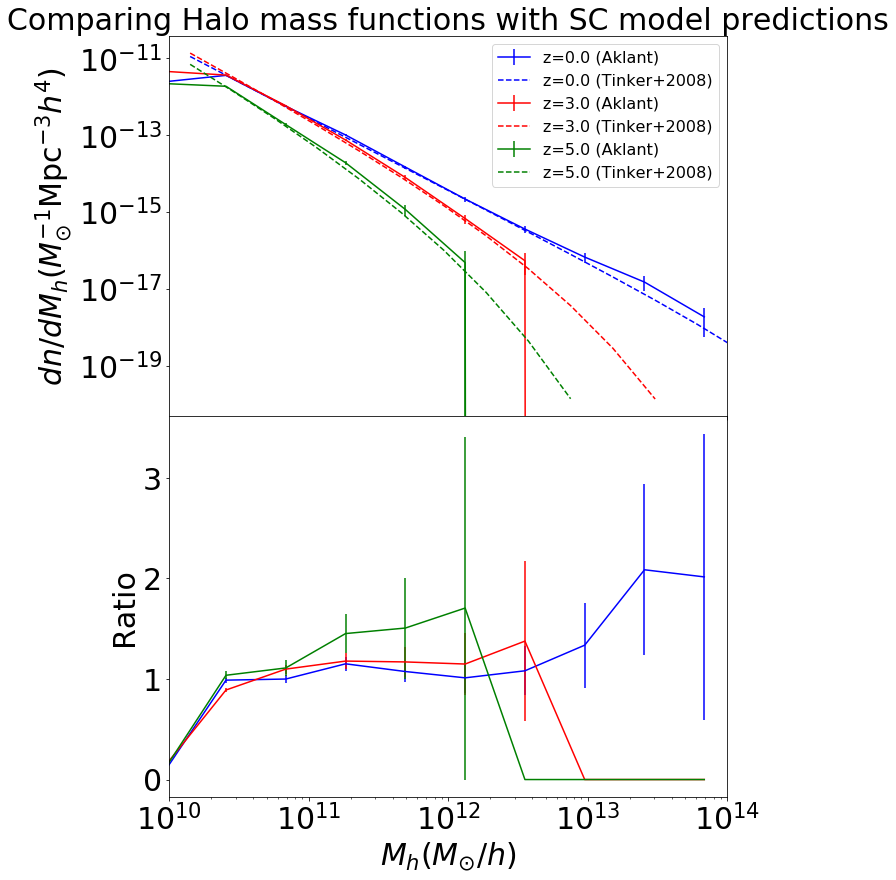

In [37]:
f,ax=plt.subplots(2,1,figsize=(10,14),sharex=True)
Nbins=15
log_mass_min=8
log_mass_max=14
ax[0].set_title('Comparing Halo mass functions with SC model predictions',fontsize=30)
for desired_redshift,col in zip([0.,3., 5.],['blue','red','green']):
    object_type='group'
    basePath = '/ufrc/lblecha/aklantbhowmick/arepo_runs_aklant/L25_n128/output/'
    category='total'
    centers,HMF,dHMF,output_redshift=arepo_package.get_mass_function(category,object_type,desired_redshift,basePath,Nbins,log_mass_min,log_mass_max,list_all=False)
    print(dHMF)
    ax[0].errorbar(centers,HMF,dHMF,color=col,label='z=%.1f (Aklant)'%output_redshift)
    
    
    HM_sp,HMF_sp=numpy.load('../spherical_collapse_model/mass_functions/mass_function_z%.1f.npy'%desired_redshift)
    
    mask=(HMF_sp>1e-20)&(HM_sp>1e10)
    
    
    ax[0].errorbar(HM_sp[mask],HMF_sp[mask],color=col,label='z=%.1f (Tinker+2008)'%output_redshift,linestyle='dashed')
    

    gen_HMF_sp=scipy.interpolate.interp1d(numpy.log10(HM_sp[mask]),numpy.log10(HMF_sp[mask]),fill_value='extrapolate')
    
    HMF_centers_sp=10**gen_HMF_sp(numpy.log10(centers))
    
    #object_type='group'
    #basePath='/ufrc/lblecha/lblecha/arepo_runs/L25n128_ngenic_bhs_gfm_mod2_ompi_new_ddfrac0.05/output/'
    #centers_laura,HMF_laura,dHMF_laura,output_redshift=arepo_package.get_mass_function(category,object_type,desired_redshift,basePath,Nbins,log_mass_min,log_mass_max,list_all=False)
    #ax[0].errorbar(centers_laura,HMF_laura,dHMF_laura,color=col,linestyle='dashed',label="Laura's Run")
    
    ax[1].errorbar(centers,HMF/HMF_centers_sp,dHMF/HMF_centers_sp,color=col)
    
#    object_type='subhalo'
#    centers,HMF,dHMF=arepo_package.get_mass_function(category,object_type,desired_redshift,basePath,Nbins,log_mass_min,log_mass_max)
#    ax.errorbar(centers,HMF,dHMF)
#    print("-----------")
    

ax[0].set_xlim(1e10,1e14)    
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].tick_params(labelsize=30)
ax[1].tick_params(labelsize=30)

ax[1].set_xlabel('$M_{h}(M_{\odot}/h)$',fontsize=30)

ax[0].set_ylabel('$dn/dM_{h}(M_{\odot}^{-1} \mathrm{Mpc}^{-3}h^4)$',fontsize=30)

ax[0].legend(loc='upper right',fontsize=16)



ax[1].set_ylabel('Ratio',fontsize=30)

plt.subplots_adjust(hspace=0)





# Cell 5: Generating galaxy stellar mass funtion

Desired redshift:  0.0
Output redshift:  2.220446049250313e-16
Output snapshot:  19
[5.90071777e-12 2.93790969e-12 1.19472784e-12 5.68643709e-13
 2.94527569e-13 1.71451184e-13 6.53570223e-14 2.57120632e-14
 1.49883495e-14 7.55612230e-15 2.76738572e-15 9.55573617e-16
 2.47468468e-16 0.00000000e+00]
Desired redshift:  0.0
Output redshift:  2.220446049250313e-16
Output snapshot:  19


/apps/jupyterhub/1.0.0/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


Desired redshift:  3.0
Output redshift:  2.9891842243418814
Output snapshot:  9
[8.70673890e-12 3.18879234e-12 1.06859706e-12 5.53477143e-13
 2.13672756e-13 8.57255918e-14 3.84526998e-14 1.48448666e-14
 4.86286272e-15 1.78099511e-15 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
Desired redshift:  3.0
Output redshift:  2.9891842243418814
Output snapshot:  9
Desired redshift:  5.0
Output redshift:  4.995933468164624
Output snapshot:  7
[4.69435901e-12 1.94514509e-12 5.34298532e-13 9.22461906e-14
 9.55573617e-14 3.49973263e-14 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
Desired redshift:  5.0
Output redshift:  4.995933468164624
Output snapshot:  7


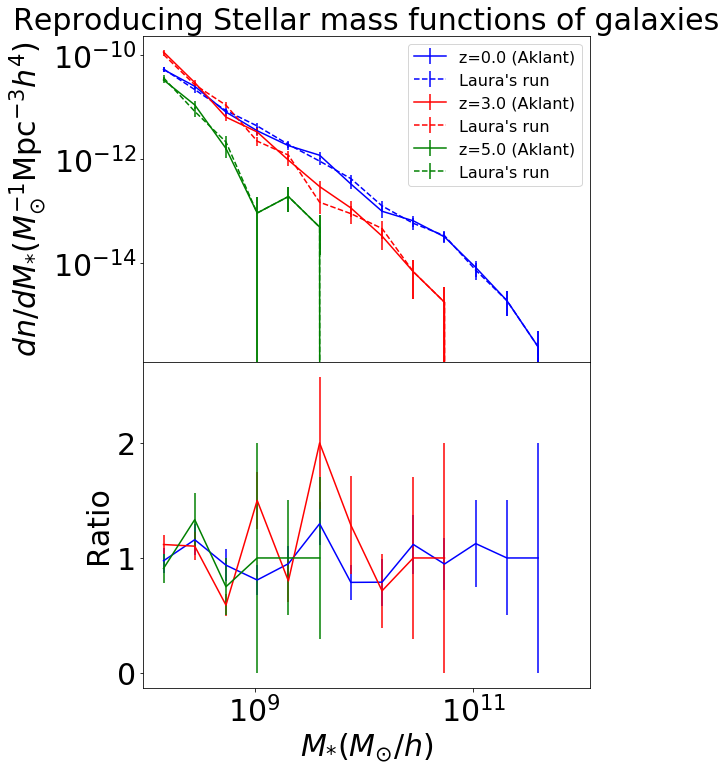

In [6]:
f,ax=plt.subplots(2,1,figsize=(8,12),sharex=True)
Nbins=15
log_mass_min=8
log_mass_max=12
#p_type=4

ax[0].set_title('Reproducing Stellar mass functions of galaxies',fontsize=30)
for desired_redshift,col in zip([0.,3., 5.],['blue','red','green']):
    object_type='subhalo'
    basePath = '/ufrc/lblecha/aklantbhowmick/arepo_runs_aklant/L25_n128/output/'
    category='stellar'
    centers,HMF,dHMF,output_redshift=arepo_package.get_mass_function(category,object_type,desired_redshift,basePath,Nbins,log_mass_min,log_mass_max,list_all=False)
    print(dHMF)
    ax[0].errorbar(centers,HMF,dHMF,color=col,label='z=%.1f (Aklant)'%output_redshift)

    
    #object_type='subhalo'
    basePath='/ufrc/lblecha/lblecha/arepo_runs/L25n128_ngenic_bhs_gfm_mod2_ompi_new_ddfrac0.05/output/'
    centers_laura,HMF_laura,dHMF_laura,output_redshift=arepo_package.get_mass_function(category,object_type,desired_redshift,basePath,Nbins,log_mass_min,log_mass_max,list_all=False)
    ax[0].errorbar(centers_laura,HMF_laura,dHMF_laura,color=col,linestyle='dashed',label="Laura's run")
    
    ax[1].errorbar(centers,HMF/HMF_laura,dHMF/HMF_laura,color=col,label="Laura's run")
    
#    object_type='subhalo'
#    centers,HMF,dHMF=arepo_package.get_mass_function(category,object_type,desired_redshift,basePath,Nbins,log_mass_min,log_mass_max)
#    ax.errorbar(centers,HMF,dHMF)
#    print("-----------")
    
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].tick_params(labelsize=30)
ax[1].tick_params(labelsize=30)

ax[1].set_xlabel('$M_{*}(M_{\odot}/h)$',fontsize=30)

ax[0].set_ylabel('$dn/dM_{*}(M_{\odot}^{-1} \mathrm{Mpc}^{-3}h^4)$',fontsize=30)

ax[0].legend(loc='upper right',fontsize=16)


ax[1].set_ylabel('Ratio',fontsize=30)

plt.subplots_adjust(hspace=0)





# Cell 6: Generating galaxy black hole mass funtion

Desired redshift:  0.0
Output redshift:  2.220446049250313e-16
Output snapshot:  19
[0.00000000e+00 0.00000000e+00 0.00000000e+00 2.57991818e-12
 1.31333017e-11 5.96088362e-12 8.96391859e-13 2.08371944e-13
 4.35441818e-14 1.09432763e-14 3.15974156e-15 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
Desired redshift:  0.0
Output redshift:  2.220446049250313e-16
Output snapshot:  19


/apps/jupyterhub/1.0.0/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


Desired redshift:  3.0
Output redshift:  2.9891842243418814
Output snapshot:  9
[0.00000000e+00 0.00000000e+00 0.00000000e+00 4.82658495e-12
 1.18369774e-11 5.20720053e-12 5.17532081e-13 4.98104217e-14
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
Desired redshift:  3.0
Output redshift:  2.9891842243418814
Output snapshot:  9
Desired redshift:  5.0
Output redshift:  4.995933468164624
Output snapshot:  7
[0.00000000e+00 0.00000000e+00 0.00000000e+00 2.57991818e-12
 5.81006426e-12 2.39134965e-12 1.33626209e-13 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
Desired redshift:  5.0
Output redshift:  4.995933468164624
Output snapshot:  7


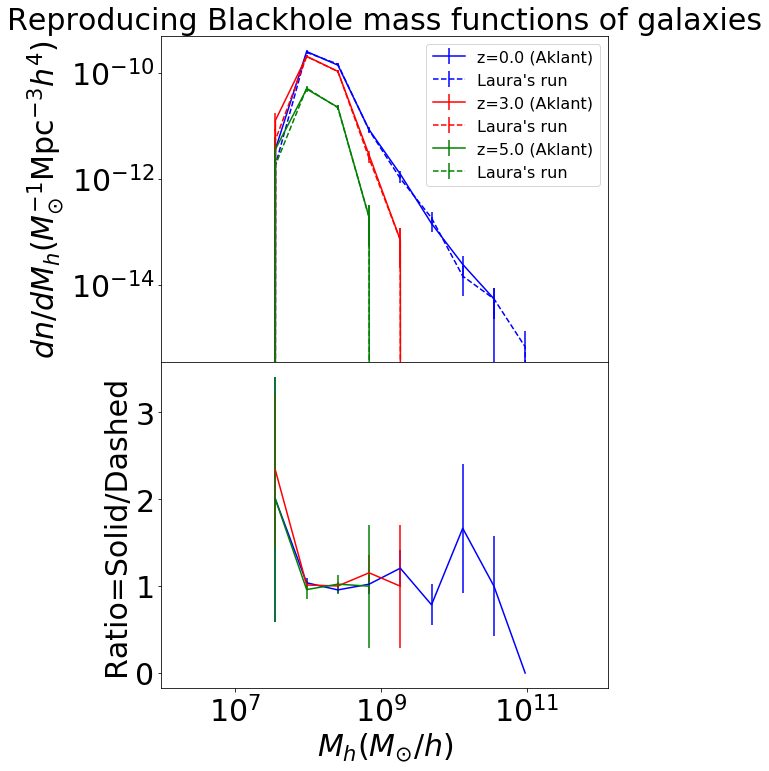

In [7]:
f,ax=plt.subplots(2,1,figsize=(8,12),sharex=True)
Nbins=15
log_mass_min=6
log_mass_max=12
#p_type=4

ax[0].set_title('Reproducing Blackhole mass functions of galaxies',fontsize=30)
for desired_redshift,col in zip([0.,3., 5.],['blue','red','green']):
    object_type='subhalo'
    basePath = '/ufrc/lblecha/aklantbhowmick/arepo_runs_aklant/L25_n128/output/'
    category='bh'
    centers,HMF,dHMF,output_redshift=arepo_package.get_mass_function(category,object_type,desired_redshift,basePath,Nbins,log_mass_min,log_mass_max,list_all=False)
    print(dHMF)
    ax[0].errorbar(centers,HMF,dHMF,color=col,label='z=%.1f (Aklant)'%output_redshift)

    
    #object_type='subhalo'
    basePath='/ufrc/lblecha/lblecha/arepo_runs/L25n128_ngenic_bhs_gfm_mod2_ompi_new_ddfrac0.05/output/'
    centers_laura,HMF_laura,dHMF_laura,output_redshift=arepo_package.get_mass_function(category,object_type,desired_redshift,basePath,Nbins,log_mass_min,log_mass_max,list_all=False)
    ax[0].errorbar(centers_laura,HMF_laura,dHMF_laura,color=col,linestyle='dashed',label="Laura's run")
    
    ax[1].errorbar(centers,HMF/HMF_laura,dHMF/HMF_laura,color=col)
    
#    object_type='subhalo'
#    centers,HMF,dHMF=arepo_package.get_mass_function(category,object_type,desired_redshift,basePath,Nbins,log_mass_min,log_mass_max)
#    ax.errorbar(centers,HMF,dHMF)
#    print("-----------")
    
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].tick_params(labelsize=30)
ax[1].tick_params(labelsize=30)

ax[1].set_xlabel('$M_{h}(M_{\odot}/h)$',fontsize=30)

ax[0].set_ylabel('$dn/dM_{h}(M_{\odot}^{-1} \mathrm{Mpc}^{-3}h^4)$',fontsize=30)

ax[0].legend(loc='upper right',fontsize=16)

ax[1].set_ylabel('Ratio=Solid/Dashed',fontsize=30)

plt.subplots_adjust(hspace=0)





# Cell 7: Generating ids of particles to be tracked. Currently set to find the 10 most massive black holes. Modify the function 'get_ids_to_tracked()' for a desired set of ids 

In [8]:
def get_ids_to_tracked(z_current,N,p_type):
    p_id_latest_z,output_redshift=arepo_package.get_particle_property(basePath,'ParticleIDs',p_type,z_current)
    bh_mass,output_redshift=arepo_package.get_particle_property(basePath,'BH_Mass',p_type,z_current)  
    indices=numpy.argsort(bh_mass)[-N:]
    p_ids_to_be_tracked=p_id_latest_z[indices]   
    return p_ids_to_be_tracked#,bh_mass[indices]-(numpy.sort(bh_mass))[-N:]

basePath = '/ufrc/lblecha/aklantbhowmick/arepo_runs_aklant/L25_n128/output/'


p_ids_to_be_tracked=get_ids_to_tracked(5,10,5)


Desired redshift:  5
Output redshift:  4.995933468164624
Output snapshot:  7
Below are the list of properties for ptype  5
dict_keys(['count', 'BH_CumEgyInjection_QM', 'BH_CumEgyInjection_RM', 'BH_CumMassGrowth_QM', 'BH_CumMassGrowth_RM', 'BH_Density', 'BH_HostHaloMass', 'BH_Hsml', 'BH_Mass', 'BH_Mdot', 'BH_MdotBondi', 'BH_MdotEddington', 'BH_Pressure', 'BH_Progs', 'BH_U', 'Coordinates', 'Masses', 'ParticleIDs', 'Potential', 'SubfindDMDensity', 'SubfindDensity', 'SubfindHsml', 'SubfindVelDisp', 'Velocities'])
Desired redshift:  5
Output redshift:  4.995933468164624
Output snapshot:  7
Below are the list of properties for ptype  5
dict_keys(['count', 'BH_CumEgyInjection_QM', 'BH_CumEgyInjection_RM', 'BH_CumMassGrowth_QM', 'BH_CumMassGrowth_RM', 'BH_Density', 'BH_HostHaloMass', 'BH_Hsml', 'BH_Mass', 'BH_Mdot', 'BH_MdotBondi', 'BH_MdotEddington', 'BH_Pressure', 'BH_Progs', 'BH_U', 'Coordinates', 'Masses', 'ParticleIDs', 'Potential', 'SubfindDMDensity', 'SubfindDensity', 'SubfindHsml', 'Su

# Cell 8: Tracing the evolution of particle properties across the available redshift snapshots . Currently set to trace the black hole mass.  

100002101088
100002105747
100002124599
100002101891
100002100369
100002099270
100002095796
100002103623
100002030429
100002108110


Text(0, 0.5, '$\\log_{10}M_{bh}[M_{\\odot}/h]$')

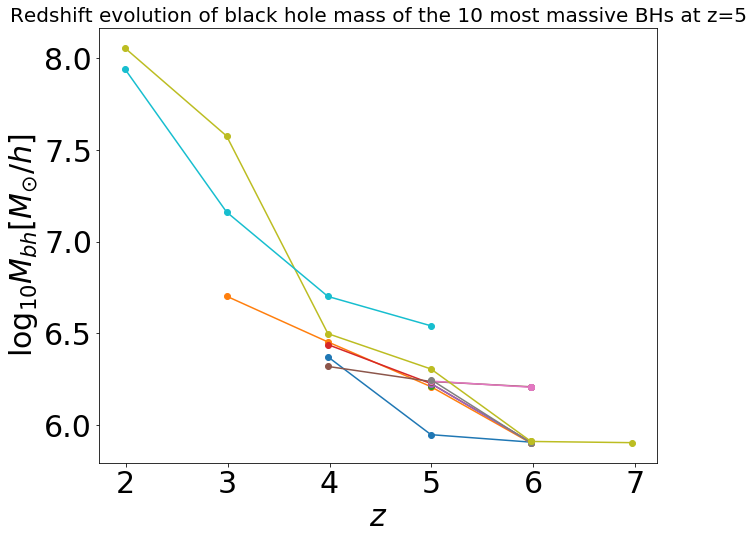

In [9]:
z_latest=0.6
z_earliest=8
z_no_of_bins=10
p_type=5

desired_property='BH_Mass'

f,ax=plt.subplots(figsize=(10,8))

ax.set_title('Redshift evolution of black hole mass of the 10 most massive BHs at z=5',fontsize=20)

for p_id_to_be_tracked in p_ids_to_be_tracked:
    print(p_id_to_be_tracked)
    bhmass_history,z_history=arepo_package.get_particle_history(z_latest,z_earliest,z_no_of_bins,p_type,p_id_to_be_tracked,desired_property,basePath)
    plt.plot(z_history,numpy.log10(bhmass_history)+10,marker='o')
    
ax.tick_params(labelsize=30)
ax.set_xlabel('$z$',fontsize=30)
ax.set_ylabel('$\log_{10}M_{bh}[M_{\odot}/h]$',fontsize=30)
 
    

# Cell 9: Tracing the evolution of particle properties across the available redshift snapshots . Currently set to trace the host halo mass.  

100002101088
100002105747


/apps/jupyterhub/1.0.0/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':


100002124599
100002101891
100002100369
100002099270
100002095796
100002103623
100002030429
100002108110


Text(0, 0.5, '$\\log_{10}M_{h}[M_{\\odot}/h]$')

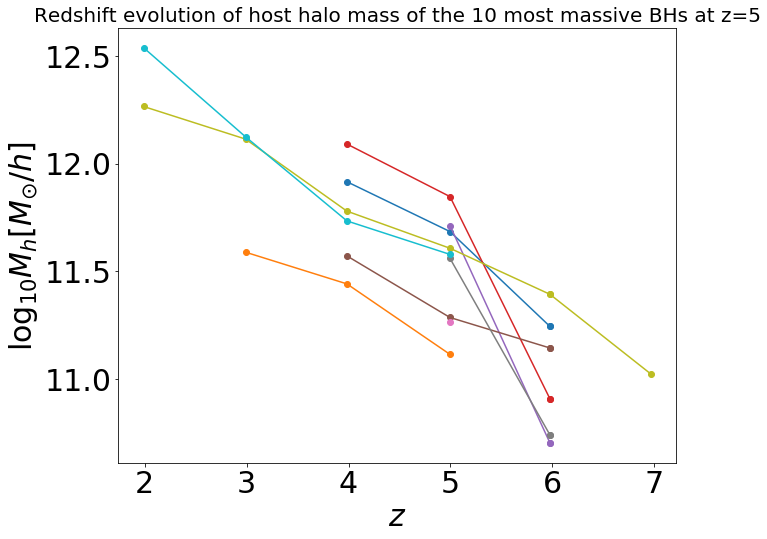

In [10]:
z_latest=0.6
z_earliest=8
z_no_of_bins=10
p_type=5

desired_property='BH_HostHaloMass'
f,ax=plt.subplots(figsize=(10,8))
ax.set_title('Redshift evolution of host halo mass of the 10 most massive BHs at z=5',fontsize=20)
for p_id_to_be_tracked in p_ids_to_be_tracked:
    print(p_id_to_be_tracked)
    bhmass_history,z_history=arepo_package.get_particle_history(z_latest,z_earliest,z_no_of_bins,p_type,p_id_to_be_tracked,desired_property,basePath)
    plt.plot(z_history,numpy.log10(bhmass_history)+10,marker='o')
    
ax.tick_params(labelsize=30)
ax.set_xlabel('$z$',fontsize=30)
ax.set_ylabel('$\log_{10}M_{h}[M_{\odot}/h]$',fontsize=30)
 
    